In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 2.4 MB/s eta 0:00:52
    --------------------------------------- 2.1/124.9 MB 6.2 MB/s eta 0:00:20
   - -------------------------------------- 5.0/124.9 MB 8.6 MB/s eta 0:00:14
   -- ------------------------------------- 6.3/124.9 MB 9.2 MB/s eta 0:00:13
   -- ------------------------------------- 8.1/124.9 MB 8.0 MB/s eta 0:00:15
   --- ------------------------------------ 10.0/124.9 MB 8.1 MB/s eta 0:00:15
   ---- ----------------------------------- 13.6/124.9 MB 9.4 MB/s eta 0:00:12
   ----- ---------------------------------- 16.5/124.9 MB 10.0 MB/s eta 0:00:11
   ------ --------------------------------- 19.4/124.9 MB 10.3 MB/s eta 0:00:11
   ------- -------------------------------- 22.5/124.9 MB 10.8 MB/s eta 0:00:10
   -------- ------------------------------- 26.2/124.9 MB 11.4 MB/s et


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from sklearn.datasets import fetch_openml
import pandas as pd

boston = fetch_openml(data_id=531, as_frame=True)  

df = boston.frame

df.head()


C:\Users\Nfcmn\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [17]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000,50.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
 14  Price    506 non-null    float64 
dtypes: category(2), float64(13)
memory usage: 53.0 KB


In [12]:
#add the target (price ) column to the data frame
df['Price'] = boston.target

In [13]:
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Price
376,15.28800,0.0,18.10,0,0.671,6.649,93.3,1.3449,24,666.0,20.2,363.02,23.24,13.9,13.9
492,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711.0,20.1,396.90,13.35,20.1,20.1
130,0.34006,0.0,21.89,0,0.624,6.458,98.9,2.1185,4,437.0,21.2,395.04,12.60,19.2,19.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7,28.7
248,0.16439,22.0,5.86,0,0.431,6.433,49.1,7.8265,7,330.0,19.1,374.71,9.52,24.5,24.5


In [15]:
df.shape

(506, 15)

In [16]:
# check for missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
Price      0
dtype: int64

In [19]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000,50.000000


In [21]:
correlation = df.corr()

C:\Users\Nfcmn\AppData\Local\Temp\ipykernel_22316\3853220190.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

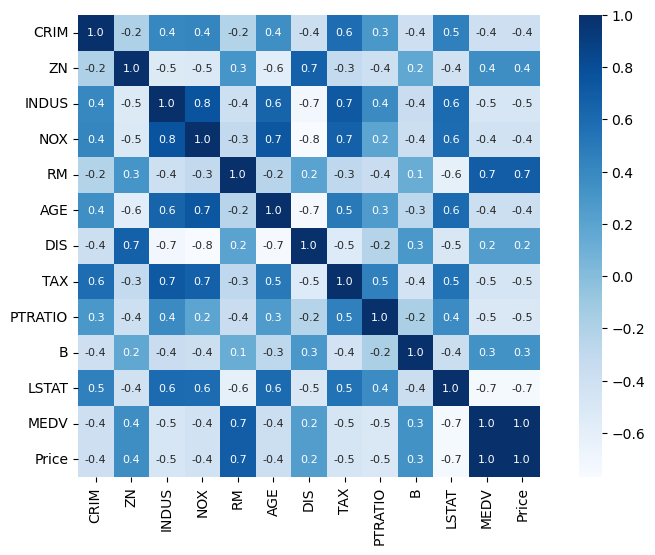

In [22]:
#heatmap for the correlations
plt.figure(figsize=(10,6))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

# 1 - كلما زاد عدد الغرف في عمود rm زاد السعر 
# 2 - كلما زاد ال LSTAT وهو السكان ذوي الدخل المحدود كلما قل السعر
# 3 - العلاقة بين السعر والضرائب ضعيفة لذا يمكن تجاهلها 

In [23]:
X = df.drop(['Price'],axis = 1)
y = df['Price']

In [24]:
X
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
print(X.shape,X_train.shape,X_test.shape)

(506, 14) (354, 14) (152, 14)


In [33]:
model = XGBRegressor()

In [37]:

model = XGBRegressor(enable_categorical=True)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
training_predictions = model.predict(X_train)

In [39]:
training_predictions

array([28.699507 , 21.20303  , 19.297907 , 23.100956 , 19.099312 ,
       25.00077  , 33.399906 ,  5.0010924, 29.600092 , 18.701038 ,
       21.699638 , 23.099712 , 22.799652 , 20.998678 , 48.79981  ,
       14.597725 , 16.597681 , 27.099903 , 20.09994  , 19.799374 ,
       20.999523 , 41.301167 , 23.20163  , 20.399378 , 18.500507 ,
       29.39996  , 36.40015  , 24.39936  , 11.80006  , 13.8008   ,
       12.296804 , 17.80076  , 33.09839  , 26.701305 , 13.39902  ,
       14.400136 , 50.00065  , 22.000048 , 19.89758  , 23.800442 ,
       17.50112  , 12.70098  ,  5.599506 , 31.099308 , 26.199575 ,
       19.403671 , 16.700045 , 13.800437 , 22.90114  , 15.29996  ,
       27.497309 , 36.099606 , 22.900112 , 24.501324 , 24.999084 ,
       50.00016  , 34.899624 , 31.697895 , 24.099892 , 22.100382 ,
       14.100374 , 42.80041  , 19.297962 , 32.199844 , 26.397001 ,
       21.79983  , 21.700014 ,  8.298618 , 46.69967  , 43.099964 ,
       31.499723 , 10.4993925, 16.700583 , 20.00389  , 33.2996

In [43]:
# R square error 
score_1 = metrics.r2_score(y_train,training_predictions)
#Mean absolute error 
score_2 = metrics.mean_absolute_error(y_train,training_predictions)
print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)


R squared error :  0.9999999887841535
Mean Absolute Error :  0.0007134841660322682


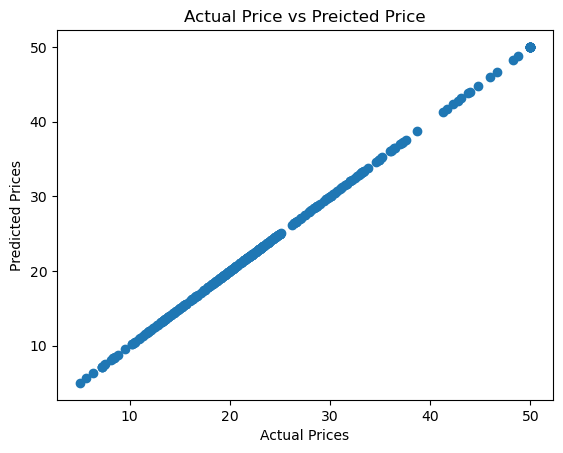

In [48]:
plt.scatter(y_train, training_predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

#Mean Absolute Error حقق نتيجة سيئة وذلك بسبب اننا قمنا بتطبيق التنبؤ على بيانات التدريب 

In [44]:
predictions = model.predict(X_test)


In [45]:
r2_test = r2_score(y_test, predictions)

mae_test = mean_absolute_error(y_test, predictions)
print("Test R²:", r2_test)
print("Test MAE:", mae_test)

Test R²: 0.9990034711567013
Test MAE: 0.14555422130383935


قمنا بحل المشكلة وطبقنا التنبؤ على بيانات الاختبار وحققنا درجة افضل  